In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/Users/taryn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load Prestige data and build OLS model

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
y = prestige['prestige']
x = prestige[['income', 'education']].astype(float)
x['const'] = 1
prestige_model = sm.OLS(endog=y, exog=x).fit()

In [3]:
prestige_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           8.65e-17
Time:                        14:44:00   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
const         -6.0647      4.272     -1.420      0.163     -14.686       2.556
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Load Credit Card data and build OLS model

In [4]:
credit_card = sm.datasets.ccard.load_pandas()

In [5]:
credit_model = sm.OLS(endog=np.log(credit_card.endog),
                      exog=credit_card.exog).fit()

In [6]:
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AVGEXP   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     333.5
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           6.91e-44
Time:                        14:44:10   Log-Likelihood:                -110.89
No. Observations:                  72   AIC:                             229.8
Df Residuals:                      68   BIC:                             238.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0333      0.019      1.798      0.077      -0.004       0.070
INCOME         1.6774      0.259      6.471      0.000       1.160       2.195
INCOMESQ      -0.1280      0.025     -5.221      0.000      -0.177      -0.079
OWNRENT       -0.0781      0.326     -0.240      0.811      -0.728       0.571
==============================================================================
Omnibus:                        8.245   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.687
Skew:                          -0.748   Prob(JB):                       0.0214
Kurtosis:                       3.572   Cond. No.                         87.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### EDA for credit card model

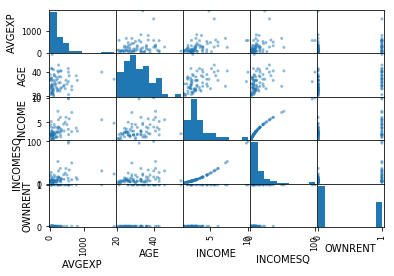

In [8]:
pd.plotting.scatter_matrix(credit_card.data);


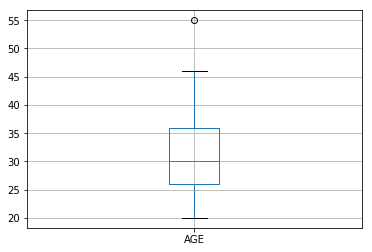

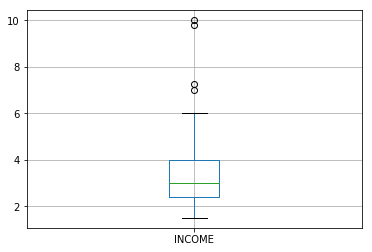

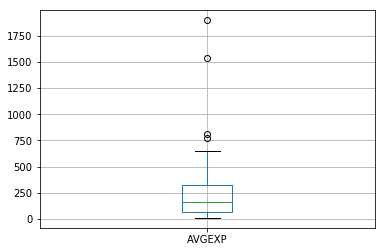

In [9]:
credit_card.data.boxplot(column='AGE',return_type='dict');
plt.figure()
credit_card.data.boxplot(column='INCOME',return_type='dict');
plt.figure()
credit_card.data.boxplot(column='AVGEXP',return_type='dict');

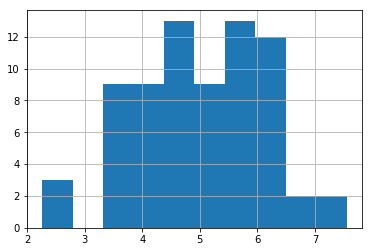

In [10]:
np.log(credit_card.endog).hist()

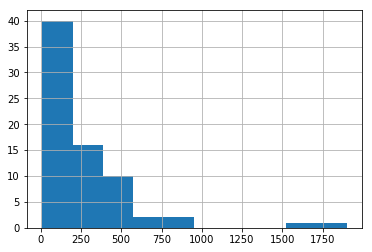

In [11]:
credit_card.endog.hist()

### Residual Plot for Credit Card data

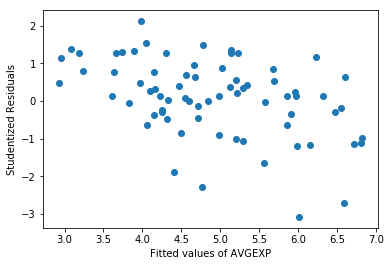

In [12]:
student_resid = credit_model.outlier_test()['student_resid']
plt.scatter(credit_model.fittedvalues, student_resid)
plt.xlabel('Fitted values of AVGEXP')
plt.ylabel('Studentized Residuals')

### Compare the herteroskadasticity of residuals before and after taking log

In [13]:
from statsmodels.stats.diagnostic import HetGoldfeldQuandt

hetero_test = HetGoldfeldQuandt()

print(hetero_test.run(credit_card.endog.values, credit_card.exog.values))
print(hetero_test(np.log(credit_card.endog.values), credit_card.exog.values))

(1.4202497795783544, 0.16302616658239355, 'increasing')
(0.45858392518392954, 0.98466526000380739, 'increasing')


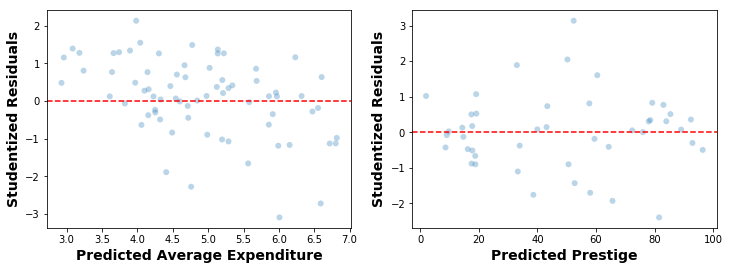

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


student_resid = credit_model.outlier_test()['student_resid']
student_resid2 = prestige_model.outlier_test()['student_resid']

ax1.scatter(credit_model.fittedvalues, student_resid, edgecolor='none', alpha=.3)
ax1.set_xlabel('Predicted Average Expenditure', fontsize=14, fontweight='bold')
ax1.set_ylabel('Studentized Residuals', fontsize=14, fontweight='bold')
ax1.axhline(0, color='r', linestyle='--')

ax2.scatter(prestige_model.fittedvalues, student_resid2, edgecolor='none', alpha=.3)
ax2.set_xlabel('Predicted Prestige', fontsize=14, fontweight='bold')
ax2.set_ylabel('Studentized Residuals', fontsize=14, fontweight='bold')
ax2.axhline(0, color='r', linestyle='--')


### Q-Q plots

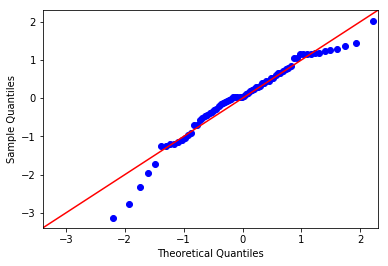

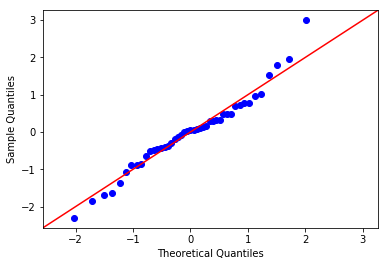

In [15]:
sm.graphics.qqplot(student_resid, line='45', fit=True)
plt.show()
sm.graphics.qqplot(student_resid2, line='45', fit=True)
plt.show()

##VIF

In [16]:
variance_inflation_factor(x.values, 2)

4.5947654804560365

### Influence Plot

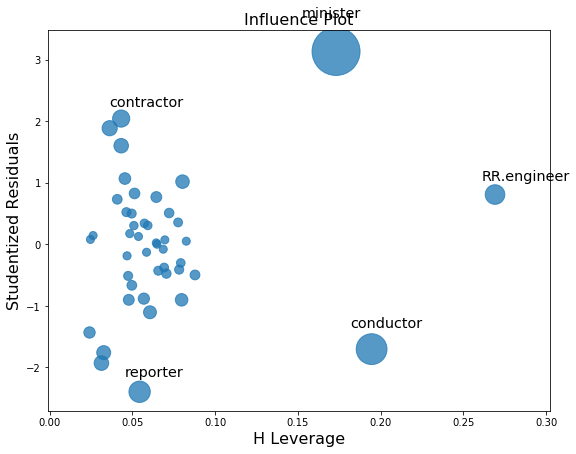

In [31]:
fig, ax = plt.subplots(figsize=(9,7))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")